# **Task 6**

## Abdullah Alsaedi
## Raneem Alshaye
## Jana Saadawi

# About Dataset

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
train_df = pd.read_csv('new_train.csv')

In [3]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


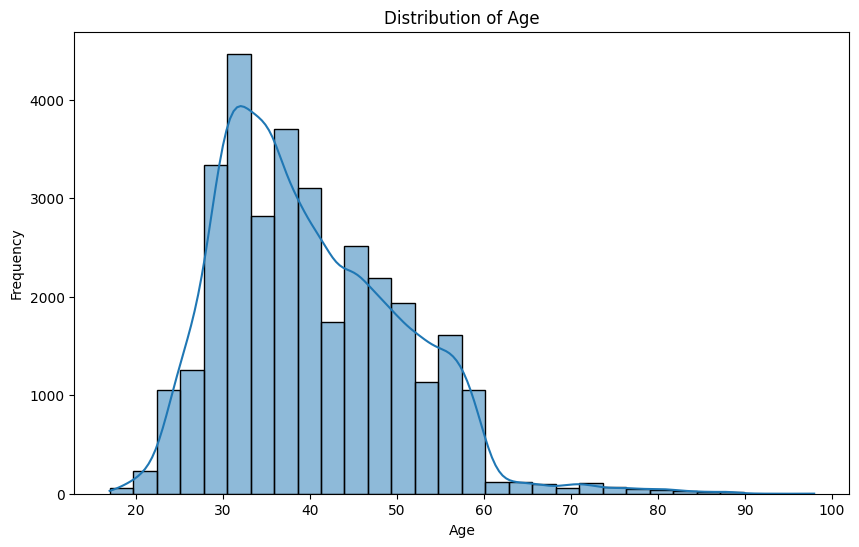

In [4]:
# Plot histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

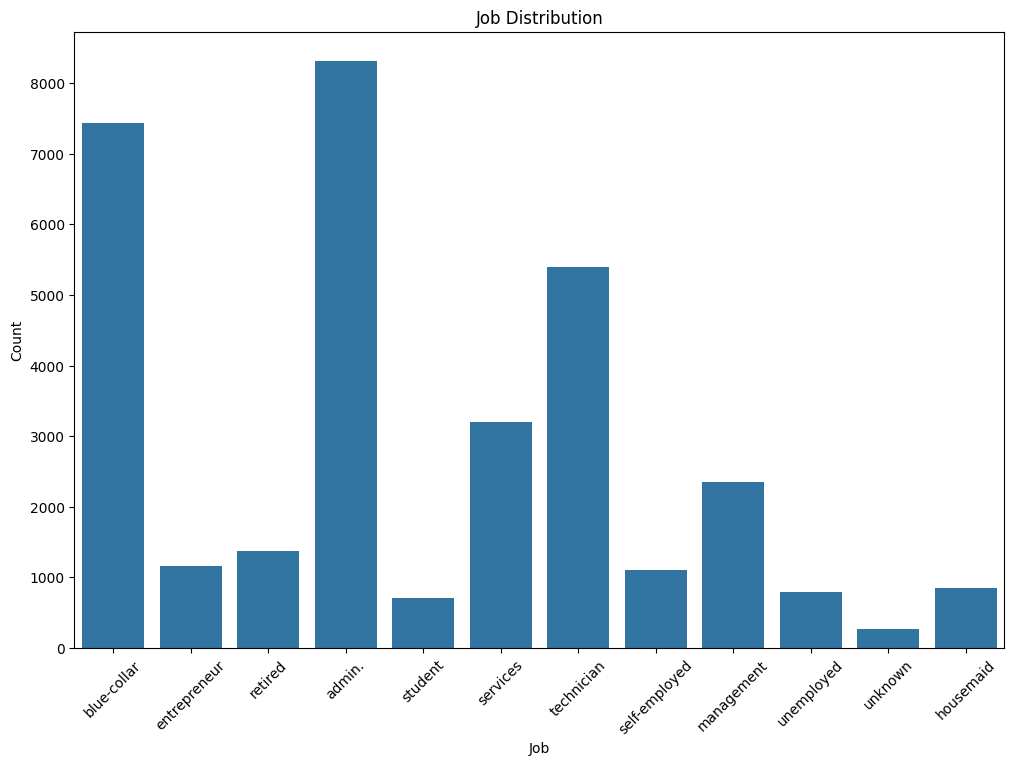

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='job')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

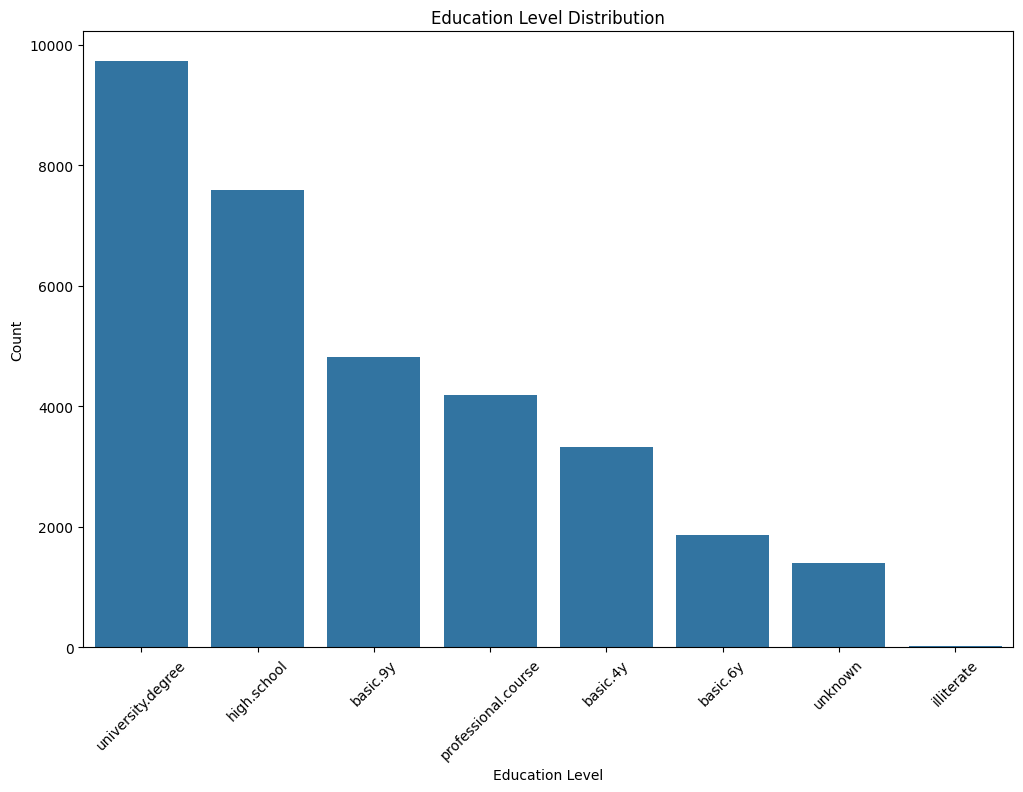

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='education', order = train_df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

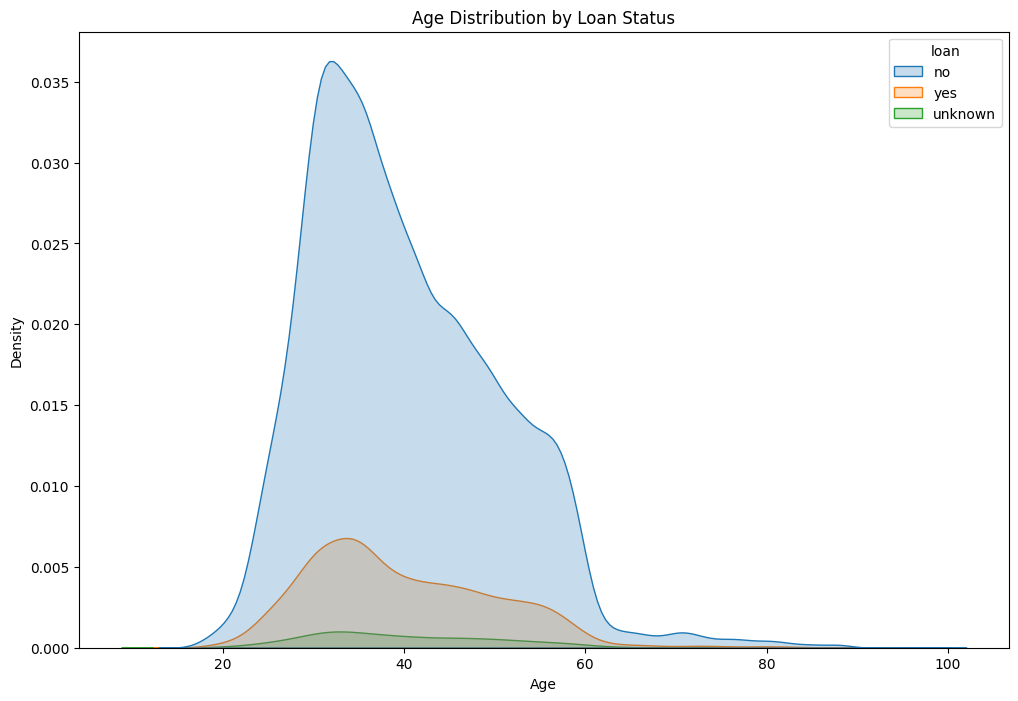

In [7]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=train_df, x='age', hue='loan', fill=True)
plt.title('Age Distribution by Loan Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

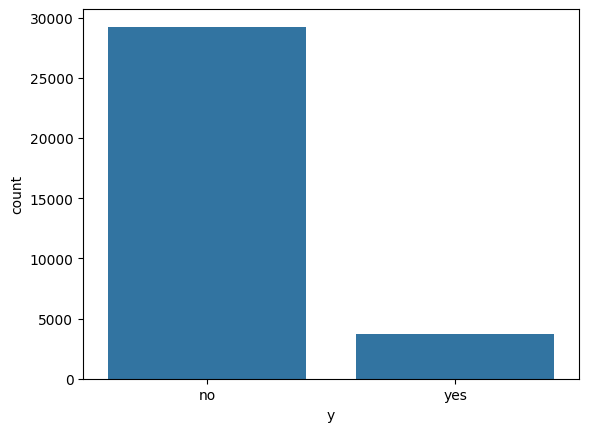

In [8]:

sns.countplot(x="y",data=train_df)
plt.show()

# Preprocessing Data

In [9]:
train_df.drop_duplicates(inplace=True)

In [10]:
train_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [11]:
train_df['y'].value_counts()

y
no     29230
yes     3712
Name: count, dtype: int64

In [12]:
nominal_col = train_df[['job','marital','education','default','housing','loan','contact','poutcome']]
ordinal_col = train_df[['month','day_of_week','y']]
numeric_col = train_df[['age','duration','campaign','pdays','previous']]

# LabelEncoder for ordinal_col

In [13]:

month_mapping = {'mar': 0, 'apr': 1, 'may': 2, 'jun': 3, 'jul': 4, 'aug': 5, 'sep': 6, 'oct': 7, 'nov': 8, 'dec': 9}
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
y_mapping = {'no':0, 'yes':1}

train_df['month'] = train_df['month'].map(month_mapping)
train_df['day_of_week'] = train_df['day_of_week'].map(day_mapping)
train_df['y'] = train_df['y'].map(y_mapping)

# one-hot encoding for nominal_col

In [14]:
from sklearn.preprocessing import OneHotEncoder
train_df = pd.get_dummies(train_df, columns=['job','marital','education','default','housing','loan','contact','poutcome'])


In [15]:
X = train_df.drop('y', axis= 1)
y = train_df['y']

In [16]:
X.columns

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [17]:
X

,age,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,8,2,227,4,999,0,False,True,False,...,False,False,True,False,False,True,False,False,True,False
1,37,8,2,202,2,999,1,False,False,True,...,False,False,True,False,False,False,True,True,False,False
2,78,4,0,1148,1,999,0,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,36,2,0,120,2,999,0,True,False,False,...,False,True,True,False,False,False,True,False,True,False
4,59,3,1,368,2,999,0,False,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,4,1,192,1,999,0,False,False,False,...,False,True,True,False,False,True,False,False,True,False
32946,52,8,4,64,1,999,1,False,False,False,...,False,True,True,False,False,True,False,True,False,False
32947,54,4,0,131,4,999,0,True,False,False,...,False,False,False,False,True,True,False,False,True,False
32948,29,2,4,165,1,999,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False


In [18]:
X.shape

(32942, 45)

In [19]:
X.dtypes

age                              int64
month                            int64
day_of_week                      int64
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
job_admin.                        bool
job_blue-collar                   bool
job_entrepreneur                  bool
job_housemaid                     bool
job_management                    bool
job_retired                       bool
job_self-employed                 bool
job_services                      bool
job_student                       bool
job_technician                    bool
job_unemployed                    bool
job_unknown                       bool
marital_divorced                  bool
marital_married                   bool
marital_single                    bool
marital_unknown                   bool
education_basic.4y                bool
education_basic.6y                bool
education_basic.9y       

In [20]:
y.value_counts()

y
0    29230
1     3712
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)




In [22]:
y_test.value_counts()

y
0    5847
1     742
Name: count, dtype: int64

In [23]:
train_df['y'].value_counts()

y
0    29230
1     3712
Name: count, dtype: int64

# Handling Imbalanced Data with Under Sample

In [24]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())


/var/folders/tj/n1kj97nx17bc22cwt_bmmm_h0000gn/T/ipykernel_5226/2550301795.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())


In [25]:
drra = pd.DataFrame(y_train_res, columns=['y'])
drra.value_counts()

y
0    2376
1    2376
Name: count, dtype: int64

In [26]:
drra


,y
0,0
1,0
2,0
3,0
4,0
...,...
4747,1
4748,1
4749,1
4750,1


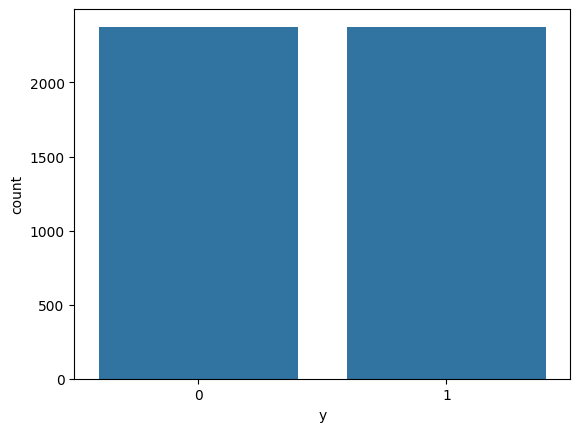

In [27]:

sns.countplot(x="y",data=drra)
plt.show()

# Scaling the features with MinMaxScaler


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_valid_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# create layers

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the Model

In [30]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# class weights

In [31]:
class_weights = {0: 0.20, 1: 0.5}

history = model.fit(
    X_train_scaled,
    y_train_res,
    epochs=40,
    validation_data=(X_valid_scaled, y_val),
    class_weight=class_weights  # Apply class weights here

)


# EarlyStopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    min_delta=0.001,       
    patience=15,            
    verbose=1,             
    mode='min',           
    restore_best_weights=True 
) 

history = model.fit(
    X_train_scaled,
    y_train_res,
    epochs=200,
    validation_data=(X_valid_scaled, y_val),
    class_weight=class_weights,
    callbacks=[early_stopping]  
)

Epoch 1/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4919 - loss: 0.2056 - val_accuracy: 0.1960 - val_loss: 1.0784
Epoch 2/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5934 - loss: 0.1772 - val_accuracy: 0.4775 - val_loss: 0.8418
Epoch 3/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.6639 - loss: 0.1592 - val_accuracy: 0.6488 - val_loss: 0.7036
Epoch 4/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.7208 - loss: 0.1472 - val_accuracy: 0.5496 - val_loss: 0.8309
Epoch 5/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.7689 - loss: 0.1350 - val_accuracy: 0.6951 - val_loss: 0.6728
Epoch 6/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8001 - loss: 0.1265 - val_accuracy: 0.7959 - val_loss: 0.5123
Epoch 7/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8030 - loss: 0.1237 - val_accuracy: 0.6356 - val_loss: 0.7606
Epoch 8/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8090 - loss: 0.1

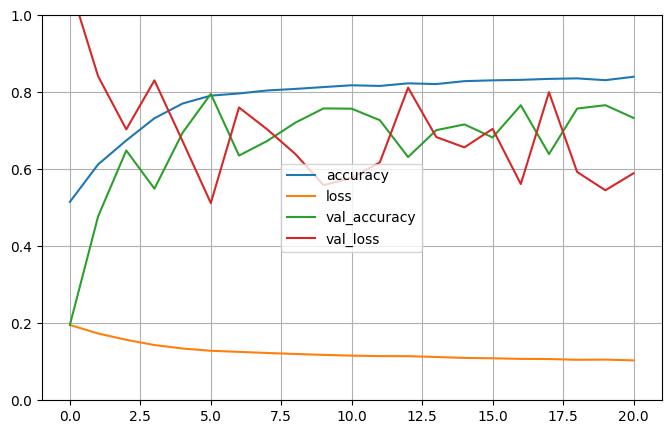

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

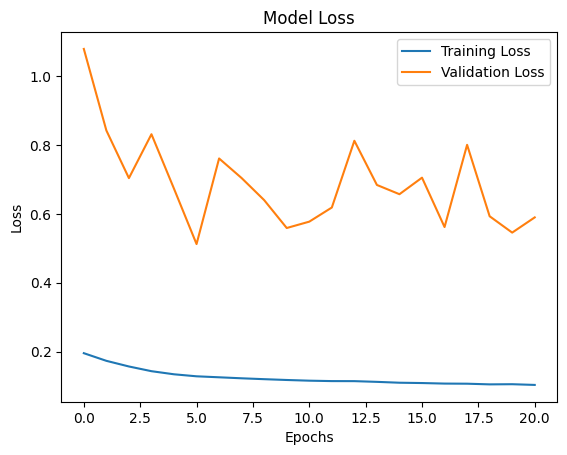

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss: {:.2f}, Test Accuracy: {:.2f}".format(test_loss, test_accuracy))


206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.7996 - loss: 0.5180
Test Loss: 0.53, Test Accuracy: 0.79


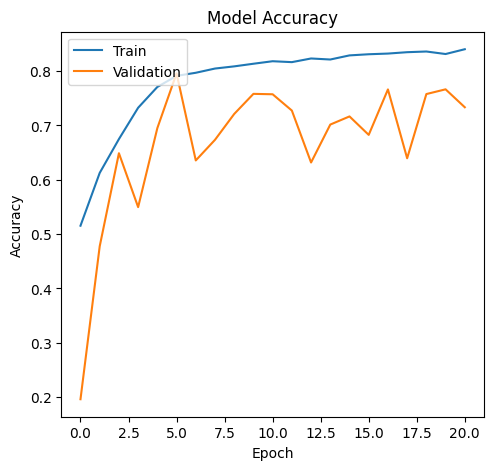

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [37]:

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to binary labels
y_pred = (y_pred_probs > 0.5).astype(int)

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


# classification report

In [38]:
from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5847
           1       0.00      0.00      0.00       742

    accuracy                           0.89      6589
   macro avg       0.44      0.50      0.47      6589
weighted avg       0.79      0.89      0.83      6589

Time taken to predict the model 0.09999299049377441


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4580 1267]
 [ 125  617]]


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix

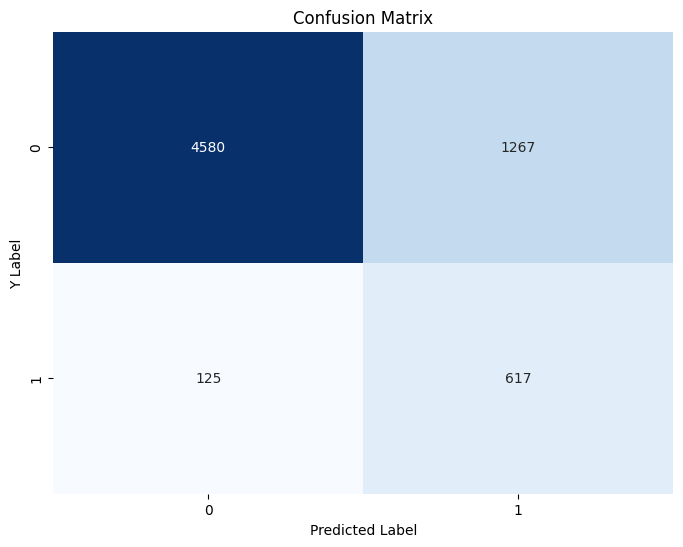

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Y Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,437 (25.15 KB)

 Trainable params: 2,145 (8.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,292 (16.77 KB)

# Perform hyperparameter tuning on the neural network model

In [43]:
import keras_tuner as kt
import tensorflow as tf
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [44]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train_scaled,y_train_res, epochs=10,
                           validation_data=(X_valid_scaled, y_val))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.8651109933853149

Best val_accuracy So Far: 0.8859798908233643
Total elapsed time: 00h 00m 10s


In [45]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 0 summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: sgd
Score: 0.8859798908233643


In [46]:
best_trial.metrics.get_last_value("val_accuracy")

0.8859798908233643

In [47]:
best_hp = random_search_tuner.get_best_hyperparameters()[0]

print("Best number of hidden layers: ", best_hp.get('n_hidden'))
print("Best number of neurons per layer: ", best_hp.get('n_neurons'))
print("Best learning rate: ", best_hp.get('learning_rate'))
print("Best optimizer: ", best_hp.get('optimizer'))


Best number of hidden layers:  5
Best number of neurons per layer:  25
Best learning rate:  0.0006562536901904111
Best optimizer:  sgd


In [48]:


model = build_model(best_hp)

model.fit(X_train_scaled, y_train_res, epochs=10, validation_data=(X_valid_scaled, y_val))

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss: {:.2f}, Test Accuracy: {:.2f}".format(test_loss, test_accuracy))

Epoch 1/10


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5042 - loss: 0.6907 - val_accuracy: 0.1152 - val_loss: 0.7274
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.4918 - loss: 0.6919 - val_accuracy: 0.1205 - val_loss: 0.7238
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.4991 - loss: 0.6900 - val_accuracy: 0.1315 - val_loss: 0.7206
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5027 - loss: 0.6898 - val_accuracy: 0.1468 - val_loss: 0.7178
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5077 - loss: 0.6888 - val_accuracy: 0.1685 - val_loss: 0.7153
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5107 - loss: 0.6879 - val_accuracy: 0.2019 - val_loss: 0.7130
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5066 - loss: 0.6883 - val_accuracy: 0.2379 - val_loss: 0.7109
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5067 - loss: 0.6882 - val_accuracy: